# Frailty ML Modeling
## Author: Shehbeel Arif

## Load libraries

In [46]:
import pandas as pd
# Import sklearn package for splitting data into Training and Testing datasets
from sklearn.model_selection import train_test_split
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Import sklearn package to assess model accuracy
from sklearn import metrics

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data Preprocessing

In [33]:
# Load data
data_dir = '/Users/shehbeel/Documents/frailty-clinical-model/data/'
meta = pd.read_csv(data_dir + 'GSE144304_meta.txt', delimiter='\t')
counts = pd.read_csv(data_dir + 'GSE144304_raw_counts.csv', index_col='ENSEMBL_ID')

# Transpose counts
counts = counts.T
counts = counts.reset_index()

# Merge counts and meta data
df = pd.merge(meta, counts, left_on='sample_name', right_on='index').drop(['index'], axis=1)

# Sanity check
df

,sample_name,gender,treatment,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,...,ENSG00000284592.1,ENSG00000284594.1,ENSG00000284595.1,ENSG00000284596.1,ENSG00000284600.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique
0,s301,male,frail,99,20,284,101,19,15,252,...,0,0,0,0,0,1296261,302945,0,0,2856908
1,s302,male,frail,54,3,381,127,7,39,113,...,0,0,0,0,0,1302608,327263,0,0,3446180
2,s303,male,frail,44,2,303,123,9,16,147,...,0,0,0,0,0,1366217,301250,0,0,3418237
3,s304,male,frail,59,3,306,146,1,6,92,...,0,0,0,0,0,1540770,345828,0,0,3559093
4,s305,male,frail,52,0,402,103,10,31,115,...,0,0,0,0,0,1309163,337983,0,0,3084020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,s530,female,young,54,0,349,139,5,4,51,...,0,0,0,0,0,1110465,272000,0,0,2761633
76,s531,male,young,73,0,395,115,16,13,103,...,0,0,0,0,0,1103164,300310,0,0,3176856
77,s401,male,fit,55,2,252,97,4,17,48,...,0,0,0,0,0,1336720,268400,0,0,2459709
78,s404,male,fit,72,4,204,99,21,31,196,...,0,0,0,0,0,1363549,276365,0,0,2695024


## Split into Training and Testing set

In [61]:
# Split the dataset into training data and labels
# X = df.loc[:, df.columns != 'treatment']
# X = X.iloc[:,1:]
X = df.iloc[:,3:].values
y = df.loc[:, df.columns == 'treatment'].values.ravel()

# Sanity check
#print(X[:5])
#print(y[:5])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=123)

#Sanity check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(64, 58283) (16, 58283) (64,) (16,)


---

## Build Baseline Model (Random Forest)

In [89]:
# Instantiate the Random Forest Classifier
rfc = RandomForestClassifier(max_depth=3, random_state=123)

# Fit the classifier to data
rfc.fit(X_train, y_train)

# Predict on test dataset
y_pred = rfc.predict(X_test)

# Accuracy of model
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(rfc.predict_proba(X_test))

Accuracy: 0.8125
[[0.50522986 0.38874682 0.10602332]
 [0.2916301  0.08702134 0.62134856]
 [0.57351634 0.26786867 0.15861499]
 [0.5639789  0.26760815 0.16841295]
 [0.15582134 0.07560911 0.76856955]
 [0.57315123 0.31930137 0.10754739]
 [0.13555967 0.11158319 0.75285714]
 [0.29692915 0.58981942 0.11325143]
 [0.441108   0.4611907  0.0977013 ]
 [0.56115227 0.28476411 0.15408362]
 [0.150914   0.15400304 0.69508296]
 [0.5584114  0.20393808 0.23765052]
 [0.40095571 0.55213088 0.0469134 ]
 [0.32444699 0.07461678 0.60093623]
 [0.38979652 0.41563011 0.19457337]
 [0.44826567 0.29932209 0.25241224]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

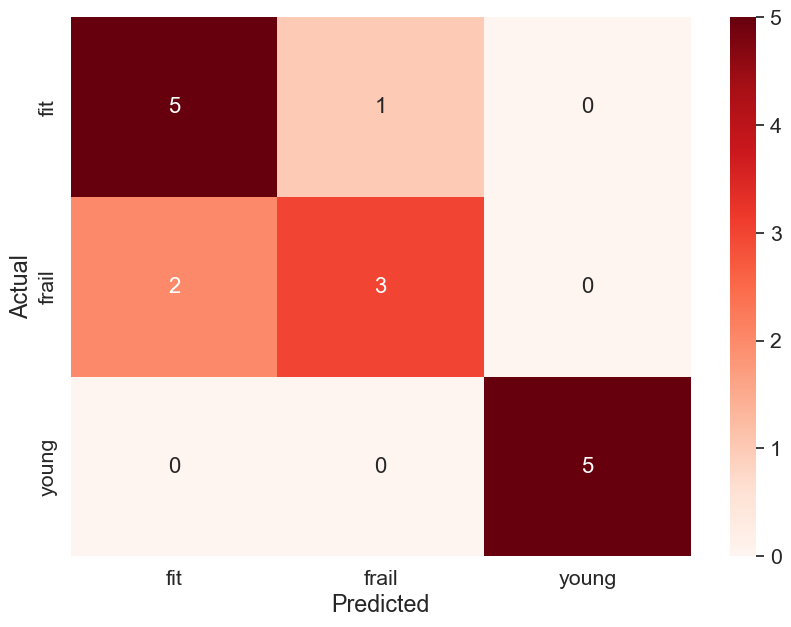

In [77]:
# Build confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm, cmap="Reds", annot=True,annot_kws={"size": 16})# font size

In [69]:
# What are the most important features?
feature_list = df.columns
feature_list = feature_list.drop(['sample_name', 'gender', 'treatment'])

imp_features = pd.Series(rfc.feature_importances_, index=feature_list)

imp_genes = imp_features.sort_values(ascending=False).to_frame().reset_index()
imp_genes.columns = ["features", "importance"]

imp_genes_fil = imp_genes[~(imp_genes == 0.000000).any(axis=1)]
imp_genes_fil

,features,importance
0,ENSG00000105726.16,0.009816
1,ENSG00000025770.18,0.009170
2,ENSG00000174227.15,0.007874
3,ENSG00000162341.16,0.007780
4,ENSG00000112782.15,0.007334
...,...,...
488,ENSG00000172893.15,0.000327
489,ENSG00000233388.2,0.000298
490,ENSG00000132964.11,0.000295
491,ENSG00000180389.6,0.000276


In [82]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev


# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
lst_accu_stratified = []

rfc = RandomForestClassifier(max_depth=3, random_state=123)

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    rfc.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(rfc.score(x_test_fold, y_test_fold))
  
# Print the output
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.875, 0.625, 0.75, 0.875, 0.625, 0.875, 1.0, 0.625, 0.75, 0.75]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 62.5 %

Overall Accuracy: 77.5 %

Standard Deviation is: 0.12909944487358055


In [ ]:
rfc.predict_proba(y_test)

In [85]:
from sklearn.linear_model import LogisticRegression

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
lst_accu_stratified = []

lr = LogisticRegression(max_iter=500, random_state=123)

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(rfc.score(x_test_fold, y_test_fold))
  
# Print the output
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 75.0 %

Overall Accuracy: 97.5 %

Standard Deviation is: 0.07905694150420949


In [123]:
lr.predict_proba(X_test)[6][2]

1.0

In [92]:
y_test

array(['fit', 'young', 'fit', 'fit', 'young', 'fit', 'young', 'frail',
       'frail', 'fit', 'young', 'frail', 'frail', 'young', 'fit', 'frail'],
      dtype=object)

In [118]:
lr.predict_proba(X_test)

array([[5.32471135e-006, 9.40574850e-042, 9.99994675e-001],
       [5.55878325e-060, 2.84257529e-262, 1.00000000e+000],
       [1.00000000e+000, 1.08798580e-072, 8.99544196e-092],
       [1.00000000e+000, 1.00054365e-079, 2.05403057e-118],
       [3.34954921e-076, 9.63834564e-089, 1.00000000e+000],
       [1.46580678e-005, 9.99985342e-001, 3.59046328e-104],
       [7.58431232e-142, 1.35719259e-180, 1.00000000e+000],
       [8.68218401e-008, 9.99999913e-001, 2.35553314e-094],
       [1.23332483e-032, 1.00000000e+000, 7.12738138e-123],
       [1.00000000e+000, 1.14425078e-019, 3.72070267e-058],
       [2.68790325e-134, 1.38693879e-193, 1.00000000e+000],
       [3.52679160e-009, 9.99999996e-001, 2.67783823e-066],
       [1.58350558e-036, 1.00000000e+000, 9.29890454e-158],
       [3.01835552e-031, 7.14643877e-077, 1.00000000e+000],
       [1.00000000e+000, 4.59691364e-032, 2.34699110e-085],
       [2.30085944e-007, 9.99999770e-001, 9.97801118e-116]])

In [119]:
len(X_test)

16

In [157]:
prob_fit = []
prob_frail = []
prob_young = []
frailty_score = []
for i in range(len(X_test)):
    prob_fit.append(lr.predict_proba(X_test)[i][0])
    prob_frail.append(lr.predict_proba(X_test)[i][1])
    prob_young.append(lr.predict_proba(X_test)[i][2])
    frailty_score.append(lr.predict_log_proba(X_test)[i][1])


In [184]:
print("young: ", (1+frailty_score[1]/1000))
print("young: ", (1+frailty_score[4]/1000))
print("fit: ", (1+frailty_score[3]/1000))
print("fit: ", (1+frailty_score[2]/1000))
print("fit: ", (1+frailty_score[0]/1000))
print("fit: ", (1+frailty_score[14]/1000),  "(incorrectly classified as 'frail')")
print("frail: ", (1+frailty_score[15]/1000),  "(incorrectly classified as 'fit')")
print("frail: ", (1+frailty_score[11]/1000),  "(incorrectly classified as 'fit')")
print("frail: ", (1+frailty_score[7]/1000))
print("frail: ", (1+frailty_score[8]/1000))

young:  0.3977674160708363
young:  0.7973356762028598
fit:  0.8180963211516651
fit:  0.8342982014050007
fit:  0.9055327471388371
fit:  0.9278426621553794 (incorrectly classified as 'frail')
frail:  0.999999999769914 (incorrectly classified as 'fit')
frail:  0.9999999999964732 (incorrectly classified as 'fit')
frail:  0.9999999999131781
frail:  1.0


In [135]:
results_df = pd.DataFrame()
results_df['predicted'] = list(y_pred)
results_df['actual'] = list(y_test)
results_df['prob_young'] = prob_young
results_df['prob_fit'] = prob_fit
results_df['prob_frail'] = prob_frail
results_df['highest_prob'] = results_df[['prob_young', 'prob_fit', 'prob_frail']].max(axis=1)
results_df['frailty_score'] = frailty_score
results_df['correct'] = (results_df['predicted'] == results_df['actual']).astype(int)
results_df

,predicted,actual,prob_young,prob_fit,prob_frail,highest_prob,frailty_score,correct
0,fit,fit,9.999947e-01,5.324711e-06,9.405748e-42,0.999995,-94.47,1
1,young,young,1.000000e+00,5.558783e-60,2.842575e-262,1.000000,-602.23,1
2,fit,fit,8.995442e-92,1.000000e+00,1.087986e-72,1.000000,-165.70,1
3,fit,fit,2.054031e-118,1.000000e+00,1.000544e-79,1.000000,-181.90,1
4,young,young,1.000000e+00,3.349549e-76,9.638346e-89,1.000000,-202.66,1
5,fit,fit,3.590463e-104,1.465807e-05,9.999853e-01,0.999985,-0.00,1
6,young,young,1.000000e+00,7.584312e-142,1.357193e-180,1.000000,-414.16,1
7,frail,frail,2.355533e-94,8.682184e-08,9.999999e-01,1.000000,-0.00,1
8,frail,frail,7.127381e-123,1.233325e-32,1.000000e+00,1.000000,0.00,1
9,fit,fit,3.720703e-58,1.000000e+00,1.144251e-19,1.000000,-43.61,1


In [ ]:
results_df_binary = pd.DataFrame()
results_df_binary['predicted'] = list(y_pred)
results_df_binary['actual'] = list(y_test)
results_df_binary['probability_f'] = [i[0] for i in list(probs_binary)]
results_df_binary['probability_m'] = [i[1] for i in list(probs_binary)]
results_df_binary['highest_prob'] =results_df_binary[['probability_f', 'probability_m']].max(axis=1)
results_df_binary['correct'] = (results_df_binary['predicted'] == results_df_binary['actual']).astype(int)
results_df_binary

In [ ]:
# What are the most important features?
feature_list = df.columns
feature_list = feature_list.drop(['sample_name', 'gender', 'treatment'])

imp_features = pd.Series(lr.coef_, index=feature_list)

imp_genes = imp_features.sort_values(ascending=False).to_frame().reset_index()
imp_genes.columns = ["features", "importance"]

imp_genes_fil = imp_genes[~(imp_genes == 0.000000).any(axis=1)]
imp_genes_fil

In [115]:
# What are the most important features?
feature_list = df.columns
feature_list = feature_list.drop(['sample_name', 'gender', 'treatment'])

imp_features = pd.Series(lr.coef_[0], index=feature_list)

imp_genes = imp_features.sort_values(ascending=False).to_frame().reset_index()
imp_genes.columns = ["features", "importance"]

imp_genes_fil = imp_genes[~(imp_genes == 0.000000).any(axis=1)]
imp_genes_fil

,features,importance
0,ENSG00000104879.4,0.000525
1,ENSG00000198938.2,0.000480
2,ENSG00000166710.17,0.000449
3,ENSG00000128591.15,0.000406
4,ENSG00000198786.2,0.000405
...,...,...
58278,ENSG00000198727.2,-0.000467
58279,ENSG00000143549.19,-0.000481
58280,ENSG00000101470.9,-0.000606
58281,ENSG00000251562.7,-0.000745


In [114]:
len(lr.coef_[3])

IndexError: index 3 is out of bounds for axis 0 with size 3